In [1]:
import zipfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [2]:
f = zipfile.ZipFile('./aisles.csv.zip')
aisle_df = pd.read_csv(f.open('aisles.csv'))


In [3]:
aisle_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
f2 = zipfile.ZipFile('./departments.csv.zip')
department_df = pd.read_csv(f2.open('departments.csv'))

In [6]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
f3 = zipfile.ZipFile('./order_products__prior.csv.zip')
order_product_prior = pd.read_csv(f3.open('order_products__prior.csv'))

In [9]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_product_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [11]:
order_product_prior['order_id'].count()

32434489

In [12]:
f4 = zipfile.ZipFile('./order_products__train.csv.zip')
order_product_train = pd.read_csv(f4.open('order_products__train.csv'))

In [13]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [15]:
f5 = zipfile.ZipFile('./orders.csv.zip')
orders = pd.read_csv(f5.open('orders.csv'))

In [16]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [18]:
orders['order_hour_of_day'].unique()

array([ 8,  7, 12, 15,  9, 14, 16, 11, 10, 19, 18, 17, 13, 20,  0, 21, 22,
        5, 23,  4,  6,  1,  2,  3])

In [19]:
orders[orders['eval_set']=='prior'].count()

order_id                  3214874
user_id                   3214874
eval_set                  3214874
order_number              3214874
order_dow                 3214874
order_hour_of_day         3214874
days_since_prior_order    3008665
dtype: int64

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [21]:
f6 = zipfile.ZipFile('./products.csv.zip')
products = pd.read_csv(f6.open('products.csv'))

In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
print(order_product_prior.shape)
print(order_product_train.shape)
print(orders.shape)

(32434489, 4)
(1384617, 4)
(3421083, 7)


In [25]:
ordered_products = pd.merge(orders,order_product_prior,how='inner',on=['order_id'])

In [26]:
ordered_products.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


how many items in one order

In [27]:
order_basket = ordered_products.groupby(['order_id']).agg(order_size = ('product_id', 'count')).reset_index()

In [28]:
order_basket.head()

,order_id,order_size
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [29]:
ordered_products = ordered_products.merge(order_basket, how='left',on=['order_id'])

In [30]:
ordered_products.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_size
0,2539329,1,prior,1,2,8,NaN,196,1,0,5
1,2539329,1,prior,1,2,8,NaN,14084,2,0,5
2,2539329,1,prior,1,2,8,NaN,12427,3,0,5
3,2539329,1,prior,1,2,8,NaN,26088,4,0,5
4,2539329,1,prior,1,2,8,NaN,26405,5,0,5
5,2398795,1,prior,2,3,7,15.0,196,1,1,6
6,2398795,1,prior,2,3,7,15.0,10258,2,0,6
7,2398795,1,prior,2,3,7,15.0,12427,3,1,6
8,2398795,1,prior,2,3,7,15.0,13176,4,0,6
9,2398795,1,prior,2,3,7,15.0,26088,5,1,6


In [31]:
user = orders[orders['eval_set']=='prior']
user['days_since_prior_order'].dropna()

1          15.0
2          21.0
3          29.0
4          28.0
5          19.0
           ... 
3421077    22.0
3421078    29.0
3421079    30.0
3421080    18.0
3421081     7.0
Name: days_since_prior_order, Length: 3008665, dtype: float64

In [32]:
user.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [33]:
user = user.groupby(['user_id']).agg(total_orders=('order_number','max'), user_period=('days_since_prior_order','sum'),mean_user_period=('days_since_prior_order','mean'))

In [34]:
user.head(10)

,total_orders,user_period,mean_user_period
user_id,,,
1,10,176.0,19.555556
2,14,198.0,15.230769
3,12,133.0,12.090909
4,5,55.0,13.750000
5,4,40.0,13.333333
6,3,18.0,9.000000
7,20,203.0,10.684211
8,3,60.0,30.000000
9,3,36.0,18.000000


In [35]:
ordered_products['reordered'].unique()

array([0, 1])

In [36]:
ordered_products['pos_reorder'] = ordered_products['reordered']==1
ordered_products['non_first_order'] = ordered_products['order_number']>1

In [37]:
t1 = ordered_products

t1 = ordered_products.groupby(['user_id']).agg(
    user_total_products = ('user_id','count'),
    user_distinct_products = ('product_id','nunique'),
    pos_reordered = ('pos_reorder','sum'),
    non_first_order = ('non_first_order','sum')

).reset_index()


In [38]:
t1.head()

,user_id,user_total_products,user_distinct_products,pos_reordered,non_first_order
0,1,59,18,41,54
1,2,195,102,93,182
2,3,88,33,55,78
3,4,18,17,1,14
4,5,37,23,14,26


In [39]:
t1['user_reorder_rate'] = t1['pos_reordered']/t1['non_first_order']

In [40]:
del t1['pos_reordered'],t1['non_first_order']

In [41]:
t1.head(10)

,user_id,user_total_products,user_distinct_products,user_reorder_rate
0,1,59,18,0.759259
1,2,195,102,0.510989
2,3,88,33,0.705128
3,4,18,17,0.071429
4,5,37,23,0.538462
5,6,14,12,0.200000
6,7,206,68,0.711340
7,8,49,36,0.464286
8,9,76,58,0.391304
9,10,143,94,0.355072


In [42]:
user = pd.merge(user,t1,how='inner',on=['user_id'])

In [43]:
user.head()

,user_id,total_orders,user_period,mean_user_period,user_total_products,user_distinct_products,user_reorder_rate
0,1,10,176.0,19.555556,59,18,0.759259
1,2,14,198.0,15.230769,195,102,0.510989
2,3,12,133.0,12.090909,88,33,0.705128
3,4,5,55.0,13.750000,18,17,0.071429
4,5,4,40.0,13.333333,37,23,0.538462


In [44]:
user['avg_order_size'] = user['user_total_products']/user['total_orders']

In [45]:
user.head(10)

,user_id,total_orders,user_period,mean_user_period,user_total_products,user_distinct_products,user_reorder_rate,avg_order_size
0,1,10,176.0,19.555556,59,18,0.759259,5.900000
1,2,14,198.0,15.230769,195,102,0.510989,13.928571
2,3,12,133.0,12.090909,88,33,0.705128,7.333333
3,4,5,55.0,13.750000,18,17,0.071429,3.600000
4,5,4,40.0,13.333333,37,23,0.538462,9.250000
5,6,3,18.0,9.000000,14,12,0.200000,4.666667
6,7,20,203.0,10.684211,206,68,0.711340,10.300000
7,8,3,60.0,30.000000,49,36,0.464286,16.333333
8,9,3,36.0,18.000000,76,58,0.391304,25.333333
9,10,5,79.0,19.750000,143,94,0.355072,28.600000


In [46]:
t1 = orders[orders['eval_set']!='prior']
t1['time_since_last_order'] = t1['days_since_prior_order']
t1['future_dow'] = t1['order_dow']
t1['future_order_hour'] = t1['order_hour_of_day']

t1.head(10)

/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/1536333946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['time_since_last_order'] = t1['days_since_prior_order']
/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/1536333946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['future_dow'] = t1['order_dow']
/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/1536333946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,time_since_last_order,future_dow,future_order_hour
10,1187899,1,train,11,4,8,14.0,14.0,4,8
25,1492625,2,train,15,1,11,30.0,30.0,1,11
38,2774568,3,test,13,5,15,11.0,11.0,5,15
44,329954,4,test,6,3,12,30.0,30.0,3,12
49,2196797,5,train,5,0,11,6.0,6.0,0,11
53,1528013,6,test,4,3,16,22.0,22.0,3,16
74,525192,7,train,21,2,11,6.0,6.0,2,11
78,880375,8,train,4,1,14,10.0,10.0,1,14
82,1094988,9,train,4,6,10,30.0,30.0,6,10
88,1822501,10,train,6,0,19,30.0,30.0,0,19


In [47]:
t1.drop(columns=['order_number','order_dow','order_hour_of_day','days_since_prior_order'],inplace=True)

/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/500393321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1.drop(columns=['order_number','order_dow','order_hour_of_day','days_since_prior_order'],inplace=True)


In [48]:
t1.head()

,order_id,user_id,eval_set,time_since_last_order,future_dow,future_order_hour
10,1187899,1,train,14.0,4,8
25,1492625,2,train,30.0,1,11
38,2774568,3,test,11.0,5,15
44,329954,4,test,30.0,3,12
49,2196797,5,train,6.0,0,11


In [49]:
user_features = pd.merge(user,t1,how='inner',on=['user_id'])

In [50]:
user_features.head(10)

,user_id,total_orders,user_period,mean_user_period,user_total_products,user_distinct_products,user_reorder_rate,avg_order_size,order_id,eval_set,time_since_last_order,future_dow,future_order_hour
0,1,10,176.0,19.555556,59,18,0.759259,5.900000,1187899,train,14.0,4,8
1,2,14,198.0,15.230769,195,102,0.510989,13.928571,1492625,train,30.0,1,11
2,3,12,133.0,12.090909,88,33,0.705128,7.333333,2774568,test,11.0,5,15
3,4,5,55.0,13.750000,18,17,0.071429,3.600000,329954,test,30.0,3,12
4,5,4,40.0,13.333333,37,23,0.538462,9.250000,2196797,train,6.0,0,11
5,6,3,18.0,9.000000,14,12,0.200000,4.666667,1528013,test,22.0,3,16
6,7,20,203.0,10.684211,206,68,0.711340,10.300000,525192,train,6.0,2,11
7,8,3,60.0,30.000000,49,36,0.464286,16.333333,880375,train,10.0,1,14
8,9,3,36.0,18.000000,76,58,0.391304,25.333333,1094988,train,30.0,6,10
9,10,5,79.0,19.750000,143,94,0.355072,28.600000,1822501,train,30.0,0,19


product_features

In [51]:
product_features = ordered_products.groupby(['product_id']).agg(
    prod_freq = ('order_id','count'),
    prod_avg_position = ('add_to_cart_order','mean')
).reset_index()

In [52]:
product_features.head(11)

,product_id,prod_freq,prod_avg_position
0,1,1852,5.801836
1,2,90,9.888889
2,3,277,6.415162
3,4,329,9.507599
4,5,15,6.466667
5,6,8,14.125000
6,7,30,7.966667
7,8,165,8.418182
8,9,156,7.608974
9,10,2572,8.816874


In [53]:
non_first_order = ordered_products['order_number']!=1

In [54]:
group_products = ordered_products[non_first_order].groupby(['product_id']).agg(
    prod_reorder_ratio = ('reordered','mean')
).reset_index()

In [55]:
group_products.head(10)

,product_id,prod_reorder_ratio
0,1,0.647662
1,2,0.137931
2,3,0.780769
3,4,0.506897
4,5,0.642857
5,6,0.375000
6,7,0.428571
7,8,0.549669
8,9,0.585714
9,10,0.534207


In [56]:
product_features = product_features.merge(group_products, on=['product_id'], how='left')

In [57]:
product_features.head()

,product_id,prod_freq,prod_avg_position,prod_reorder_ratio
0,1,1852,5.801836,0.647662
1,2,90,9.888889,0.137931
2,3,277,6.415162,0.780769
3,4,329,9.507599,0.506897
4,5,15,6.466667,0.642857


In [58]:
group_products = ordered_products[non_first_order].groupby(['product_id','user_id']).agg(
    prod_freq = ('order_id','count')
).reset_index()

In [59]:
group_products = group_products.groupby(['product_id']).agg(
    avg_prod_freq = ('prod_freq','mean')
).reset_index()

In [60]:
product_features = product_features.merge(group_products,on=['product_id'],how='left')
product_features.head(10)

,product_id,prod_freq,prod_avg_position,prod_reorder_ratio,avg_prod_freq
0,1,1852,5.801836,0.647662,2.641566
1,2,90,9.888889,0.137931,1.160000
2,3,277,6.415162,0.780769,3.714286
3,4,329,9.507599,0.506897,1.746988
4,5,15,6.466667,0.642857,2.333333
5,6,8,14.125000,0.375000,1.600000
6,7,30,7.966667,0.428571,1.555556
7,8,165,8.418182,0.549669,1.961039
8,9,156,7.608974,0.585714,2.153846
9,10,2572,8.816874,0.534207,2.029094


In [61]:
data = ordered_products

data = data.groupby(['user_id','product_id']).agg(
    up_orders = ('product_id','count'),
    up_first_order = ('order_number','min'),
    up_last_order = ('order_number','max'),
    avg_cart_position = ('add_to_cart_order','mean')
).reset_index()

In [62]:
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position
0,1,196,10,1,10,1.400000
1,1,10258,9,2,10,3.333333
2,1,10326,1,5,5,5.000000
3,1,12427,10,1,10,3.300000
4,1,13032,3,2,10,6.333333


In [63]:
data = data.merge(user_features[['user_id','total_orders']],on=['user_id'], how='left')

In [64]:
data.head(10)

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position,total_orders
0,1,196,10,1,10,1.400000,10
1,1,10258,9,2,10,3.333333,10
2,1,10326,1,5,5,5.000000,10
3,1,12427,10,1,10,3.300000,10
4,1,13032,3,2,10,6.333333,10
5,1,13176,2,2,5,6.000000,10
6,1,14084,1,1,1,2.000000,10
7,1,17122,1,5,5,6.000000,10
8,1,25133,8,3,10,4.000000,10
9,1,26088,2,1,2,4.500000,10


In [65]:
data['up_order_rate'] = data['up_orders']/data['total_orders']

In [66]:
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position,total_orders,up_order_rate
0,1,196,10,1,10,1.400000,10,1.0
1,1,10258,9,2,10,3.333333,10,0.9
2,1,10326,1,5,5,5.000000,10,0.1
3,1,12427,10,1,10,3.300000,10,1.0
4,1,13032,3,2,10,6.333333,10,0.3


In [67]:
data['up_order_since_last_order'] = data['total_orders'] - data['up_last_order']

In [68]:
data['up_order_rate_since_last_order'] = data['up_orders']/(data['total_orders']-data['up_first_order'] + 1)

In [69]:
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position,total_orders,up_order_rate,up_order_since_last_order,up_order_rate_since_last_order
0,1,196,10,1,10,1.400000,10,1.0,0,1.000000
1,1,10258,9,2,10,3.333333,10,0.9,0,1.000000
2,1,10326,1,5,5,5.000000,10,0.1,5,0.166667
3,1,12427,10,1,10,3.300000,10,1.0,0,1.000000
4,1,13032,3,2,10,6.333333,10,0.3,0,0.333333


In [70]:
data = data.merge(user_features,on=['user_id'],how='left').merge(product_features,on=['product_id'],how='left')

In [71]:
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position,total_orders_x,up_order_rate,up_order_since_last_order,up_order_rate_since_last_order,...,avg_order_size,order_id,eval_set,time_since_last_order,future_dow,future_order_hour,prod_freq,prod_avg_position,prod_reorder_ratio,avg_prod_freq
0,1,196,10,1,10,1.400000,10,1.0,0,1.000000,...,5.9,1187899,train,14.0,4,8,35791,3.721774,0.830301,4.425040
1,1,10258,9,2,10,3.333333,10,0.9,0,1.000000,...,5.9,1187899,train,14.0,4,8,1946,4.277492,0.740800,3.459410
2,1,10326,1,5,5,5.000000,10,0.1,5,0.166667,...,5.9,1187899,train,14.0,4,8,5526,4.191097,0.684851,2.851491
3,1,12427,10,1,10,3.300000,10,1.0,0,1.000000,...,5.9,1187899,train,14.0,4,8,6476,4.760037,0.780000,3.855799
4,1,13032,3,2,10,6.333333,10,0.3,0,0.333333,...,5.9,1187899,train,14.0,4,8,3751,5.622767,0.700881,2.918672


In [72]:
order_products_future = order_product_train.merge(orders, on=['order_id'],how='left')
order_products_future = order_products_future[['user_id','product_id','reordered']]
data = data.merge(order_products_future,on=['user_id','product_id'],how='left')

data['reordered'].fillna(0,inplace=True)

In [73]:
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,avg_cart_position,total_orders_x,up_order_rate,up_order_since_last_order,up_order_rate_since_last_order,...,order_id,eval_set,time_since_last_order,future_dow,future_order_hour,prod_freq,prod_avg_position,prod_reorder_ratio,avg_prod_freq,reordered
0,1,196,10,1,10,1.400000,10,1.0,0,1.000000,...,1187899,train,14.0,4,8,35791,3.721774,0.830301,4.425040,1.0
1,1,10258,9,2,10,3.333333,10,0.9,0,1.000000,...,1187899,train,14.0,4,8,1946,4.277492,0.740800,3.459410,1.0
2,1,10326,1,5,5,5.000000,10,0.1,5,0.166667,...,1187899,train,14.0,4,8,5526,4.191097,0.684851,2.851491,0.0
3,1,12427,10,1,10,3.300000,10,1.0,0,1.000000,...,1187899,train,14.0,4,8,6476,4.760037,0.780000,3.855799,0.0
4,1,13032,3,2,10,6.333333,10,0.3,0,0.333333,...,1187899,train,14.0,4,8,3751,5.622767,0.700881,2.918672,1.0


In [74]:
X_train = data[data['eval_set']=='train']
y_train = X_train['reordered']
X_test = data[data['eval_set']=='test']


In [75]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3)

In [76]:
X_train_non_pred = X_train[['user_id','product_id','order_id']]
X_val_non_pred = X_val[['user_id','product_id','order_id']]
X_test_non_pred = X_test[['user_id','product_id','order_id']]

In [77]:
X_train.drop(['user_id','product_id','reordered','eval_set','order_id'],axis=1,inplace=True)
X_val.drop(['user_id','product_id','reordered','eval_set','order_id'],axis=1,inplace=True)
X_test.drop(['user_id','product_id','reordered','eval_set','order_id'],axis=1,inplace=True)

/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/3743411795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['user_id','product_id','reordered','eval_set','order_id'],axis=1,inplace=True)


In [78]:
print(X_train.shape)
print(y_train.shape)

(5932262, 22)
(5932262,)


In [79]:
print(X_val.shape)
print(y_val.shape)

(2542399, 22)
(2542399,)


In [80]:
print(X_test.shape)

(4833292, 22)


In [81]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [82]:
clf = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.4, learning_rate = 0.1,max_depth = 5, reg_lambda = 5.0, n_estimators = 100)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=5.0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

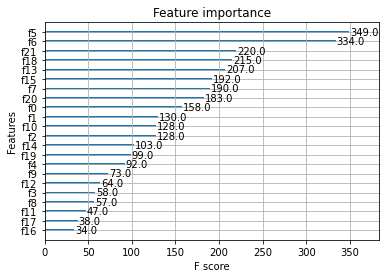

In [83]:
xgb.plot_importance(clf)

In [84]:
y_test_prob = clf.predict_proba(X_test)[:, 1]
y_val_prob = clf.predict_proba(X_val)[:, 1]
y_train_prob = clf.predict_proba(X_train)[:, 1]

In [85]:
print(y_test_prob)

[0.02258932 0.06117213 0.10142673 ... 0.00687161 0.00566083 0.013181  ]


In [86]:
from sklearn.metrics import precision_recall_curve

In [87]:
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
f1_scores = 2*recall*precision/(recall+precision)
opt_indx = np.argmax(f1_scores)
print("Maximuim f1_score for the positive class: ", f1_scores[opt_indx])
print("Correspoding precision: ", precision[opt_indx])
print("Correspoding recall: ", recall[opt_indx])
print("Correspoding Threshold: ", thresholds[opt_indx])
best_thresh = thresholds[opt_indx]

Maximuim f1_score for the positive class:  0.44227121164531
Correspoding precision:  0.395588104580143
Correspoding recall:  0.501446616045165
Correspoding Threshold:  0.21763386


In [88]:
print(best_thresh)

0.21763386


In [89]:
y_test_preds = y_test_prob>best_thresh
y_val_preds = y_val_prob>best_thresh
y_train_preds = y_train_prob>best_thresh

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

print('-----------------CLASSIFICATION REPORT--------------------')
print("Train positive class count: ", y_train.sum())
print("Train negative class count: ", y_train.shape[0] - y_train.sum())
print("Train Set tn, fp, fn, tp:",confusion_matrix(y_train, y_train_preds).ravel())
print("Train Set report:",classification_report(y_train, y_train_preds))

print("Validation positive class count: ", y_val.sum())
print("Validation negative class count: ", y_val.shape[0] - y_val.sum())
print("Validation Set tn, fp, fn, tp:",confusion_matrix(y_val, y_val_preds).ravel())
print("Validation Set report:",classification_report(y_val, y_val_preds))

-----------------CLASSIFICATION REPORT--------------------
Train positive class count:  580313.0
Train negative class count:  5351949.0
Train Set tn, fp, fn, tp: [4906132  445817  289514  290799]
Train Set report:               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93   5351949
         1.0       0.39      0.50      0.44    580313

    accuracy                           0.88   5932262
   macro avg       0.67      0.71      0.69   5932262
weighted avg       0.89      0.88      0.88   5932262

Validation positive class count:  248511.0
Validation negative class count:  2293888.0
Validation Set tn, fp, fn, tp: [2103491  190397  123897  124614]
Validation Set report:               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93   2293888
         1.0       0.40      0.50      0.44    248511

    accuracy                           0.88   2542399
   macro avg       0.67      0.71      0.69   2542399
weighted avg

In [92]:
test_orders = X_test_non_pred[['user_id','order_id','product_id']]
test_orders['reordered'] = y_test_preds

# Extracting orders who have no predicted products
empty_orders = test_orders.groupby(['order_id']).agg(
    count_reorders = ('reordered', 'sum')
).reset_index()
empty_orders = empty_orders[empty_orders['count_reorders'] == 0]

# For orders who have predicted products 
# Extract the products predicted to be in the future order
test_orders = test_orders[test_orders['reordered'] == 1]
# For each order group its predicted products together into a list 
test_orders = test_orders.groupby('order_id')['product_id'].apply(list).reset_index(name='products')

test_orders.head()

/var/folders/25/5dmj3gdn49q3xqf9qf57kr_00000gn/T/ipykernel_11450/804688611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_orders['reordered'] = y_test_preds


,order_id,products
0,17,"[13107, 21463]"
1,34,"[2596, 13176, 16083, 21137, 39180, 39475, 4350..."
2,137,"[2326, 5134, 23794, 24852, 25890, 38689, 41787]"
3,182,"[5479, 9337, 11520, 13629, 32109, 33000, 39275..."
4,257,"[24838, 24852, 27104, 27966, 29837, 30233, 376..."


In [93]:
headerNames = ['order_id', 'products', 'user_id']
rows = []

for index, row in test_orders.iterrows():
    products = ','.join(str(product_id) for product_id in row['products']) 
    rows.append( 
        {'order_id': str(row['order_id']),
         'products': products})

for index, row in empty_orders.iterrows():
    rows.append( 
        {'order_id': str(row['order_id']),
         'products': 'None'})

In [99]:
print(rows[1])

{'order_id': '34', 'products': '2596 13176 16083 21137 39180 39475 43504 44663 47766 47792'}
